<a href="https://colab.research.google.com/github/KHKGuilherme/Data-Science-PY/blob/main/Titanic_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas + Drive

In [ ]:
#------------------------------#
# Bibliotecas
#------------------------------#

# Numpy - Calculo Vetorial
import numpy as np

# Pandas
import pandas as pd

# Scikit-Learn
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Gráficos

# import os
import seaborn as sns
from graphviz import Source
# from sklearn.tree import export_graphviz
from matplotlib import pyplot as plt


# Google Drive
import os
from google.colab import drive

In [ ]:
#------------------------------#
# Drive
#------------------------------#

drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/IC/Titanic/Dataset')

Mounted at /content/drive


# Importação + Tratamento dos Dados

In [ ]:
#------------------------------#
# Importando os Datasets
#------------------------------#

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#------------------------------#
# Tratamento dos Dados - v1
#------------------------------#
# X = pd.DataFrame(train, columns = ["Pclass","Sex","Age"])
X = pd.DataFrame(train, columns = ["Pclass","Sex","Age","SibSp","Parch"])
Y = pd.DataFrame(train, columns = ["Survived"])

# Concertando o Sexo - Ele é Qualitativo mas é necessário que vire Quantitativo
X["Sex"].replace({"male":0,"female":1},inplace=True)

# Concertando a Idade - Existem dados NaN, substitua pela média das outras
X["Age"].fillna(value = X["Age"].median(),inplace=True)
X["Parch"].fillna(value = X["Parch"].median(),inplace=True)
X["SibSp"].fillna(value = X["SibSp"].median(),inplace=True)

# Gini por padrão
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.3, random_state=None)

#------------------------------#
# Tratamento dos Dados - v2
#------------------------------#
"""
# Conversão para Matrizes/Vetor (NUMPY)
x_train = np.array(train.iloc[:,2:11])
y_train = np.array(train['Survived'])

x_teste = np.array(test.iloc[:,2:11])
"""




"\n# Conversão para Matrizes/Vetor (NUMPY)\nx_train = np.array(train.iloc[:,2:11])\ny_train = np.array(train['Survived'])\n\nx_teste = np.array(test.iloc[:,2:11])\n"

# Árvore de Decisão

## Criação + Treino

In [ ]:
clf_gini = DecisionTreeClassifier(max_depth=6)
history = clf_gini.fit(X_train,Y_train)

# pd.DataFrame(history.history).plot()

## Gráfico

In [ ]:
export_graphviz(clf_gini,out_file='credit_tree.dot',feature_names=["Pclass","Sex","Age","Parch","SibSp"],rounded=True,filled=True)

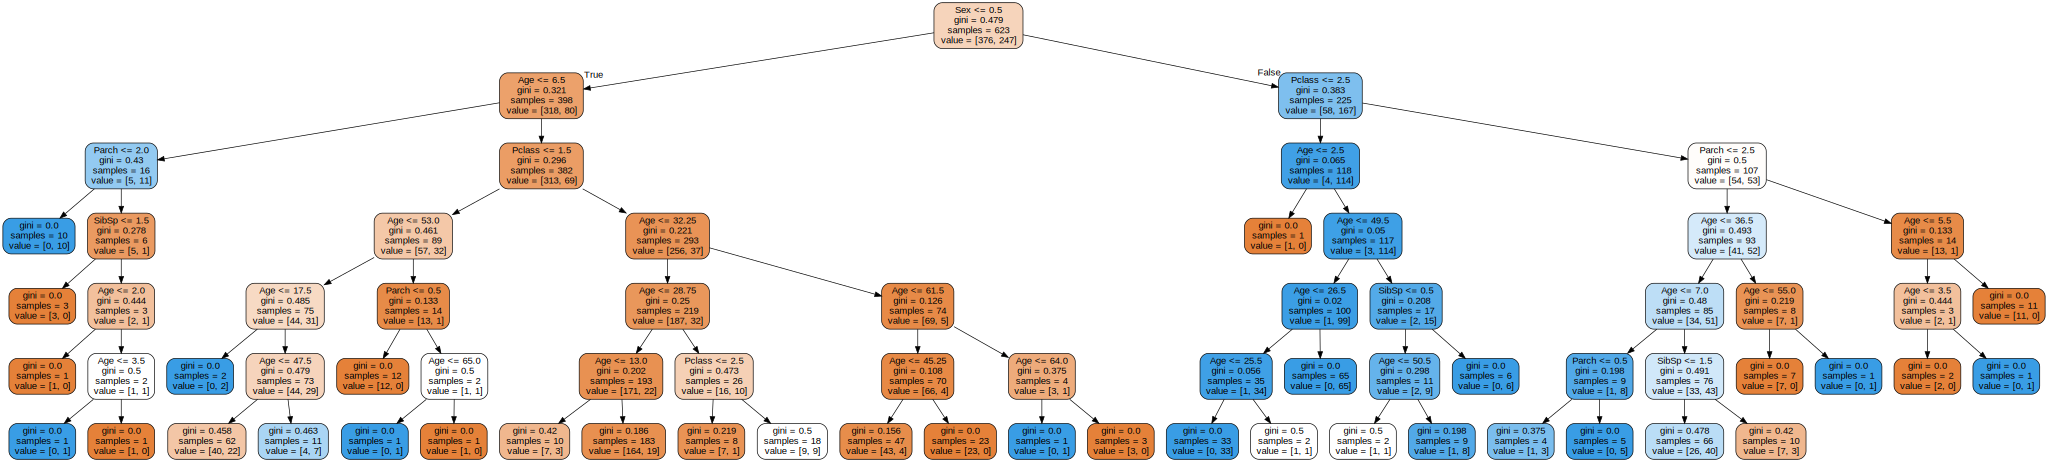

In [ ]:
Source.from_file('credit_tree.dot')

## Aplicação

In [ ]:
tree_result = clf_gini.predict(X_test)
precisao = accuracy_score(Y_test, tree_result)
precisao

0.8208955223880597

## Matriz de Confusão

Text(1.3, 1.5, 'TN')

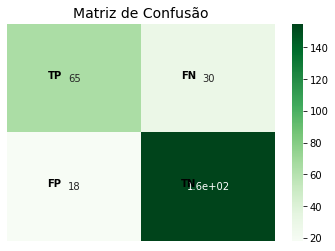

In [ ]:
# Básico
# confusion_matrix(Y_test,tree_result)

# Avançado (Por Valores)
true_negative, false_positive, false_negative, true_positive = confusion_matrix(Y_test,tree_result).ravel()

# Reorganizando Visualmente
matriz_organizada = np.array([[true_positive,false_negative],[false_positive,true_negative]])

# Gráfico
sns.heatmap(matriz_organizada,cmap='Greens',annot=True)
plt.title('Matriz de Confusão',fontsize=14)
plt.xticks([])
plt.yticks([])

plt.annotate('TP',(0.3,0.5),fontweight='bold')
plt.annotate('FN',(1.3,0.5),fontweight='bold')
plt.annotate('FP',(0.3,1.5),fontweight='bold')
plt.annotate('TN',(1.3,1.5),fontweight='bold')

In [ ]:
# Relatório Alternativo
print(classification_report(Y_test,tree_result))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       173
           1       0.78      0.68      0.73        95

    accuracy                           0.82       268
   macro avg       0.81      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268



# Etapa 2 - (27/09/2022)

## Redundancia-Correlação (Entre colunas) - Matriz de Correlação

In [ ]:
# GAMBIARRA
df_export = pd.DataFrame(train, columns = ["Pclass","Sex","Age","SibSp","Parch","Survived"])
df_export["Sex"].replace({"male":0,"female":1},inplace=True)
df_export["Age"].fillna(value = df_export["Age"].median(),inplace=True)
df_export["Parch"].fillna(value = df_export["Parch"].median(),inplace=True)
df_export["SibSp"].fillna(value = df_export["SibSp"].median(),inplace=True)

# Exportar os dados corrigidos para um novo CSV
df_export.to_csv('Teste.csv')

In [ ]:
# Correlção
df_export.corr()

,Pclass,Sex,Age,SibSp,Parch,Survived
Pclass,1.000000,-0.131900,-0.339898,0.083081,0.018443,-0.338481
Sex,-0.131900,1.000000,-0.081163,0.114631,0.245489,0.543351
Age,-0.339898,-0.081163,1.000000,-0.233296,-0.172482,-0.064910
SibSp,0.083081,0.114631,-0.233296,1.000000,0.414838,-0.035322
Parch,0.018443,0.245489,-0.172482,0.414838,1.000000,0.081629
Survived,-0.338481,0.543351,-0.064910,-0.035322,0.081629,1.000000


## Random Forest

In [ ]:
test_forest = RandomForestClassifier(max_depth=6,n_estimators=200,random_state=0,n_jobs=-1)
test_forest.fit(X_train,Y_train)
forest_result = test_forest.predict(X_test)
precisao = accuracy_score(Y_test, forest_result)
precisao

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.835820895522388

Text(1.3, 1.5, 'TN')

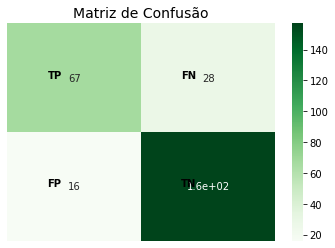

In [ ]:
# Avançado (Por Valores)
true_negative, false_positive, false_negative, true_positive = confusion_matrix(Y_test,forest_result).ravel()

# Reorganizando Visualmente
matriz_organizada = np.array([[true_positive,false_negative],[false_positive,true_negative]])

# Gráfico
sns.heatmap(matriz_organizada,cmap='Greens',annot=True)
plt.title('Matriz de Confusão',fontsize=14)
plt.xticks([])
plt.yticks([])

plt.annotate('TP',(0.3,0.5),fontweight='bold')
plt.annotate('FN',(1.3,0.5),fontweight='bold')
plt.annotate('FP',(0.3,1.5),fontweight='bold')
plt.annotate('TN',(1.3,1.5),fontweight='bold')

## Importância das Features

In [ ]:
forest_feactures = test_forest.feature_importances_
forest_feactures

array([0.18174131, 0.47392292, 0.20624621, 0.08274472, 0.05534484])

# Falta...

## MLP -- Rede Neural 
 Não precisa implementar -- Tensorflow/Keras
 Ler sobre Validação Cruzada -- Livro do Inicio - (K fold => 10 Vezes)
 
 * Criar rede
 * 4 entradas
 * Camda oculta -- Criar neuronios e Definir, testar neuronios e definir o melhor
 * Saida -- 3 neuronios -> Valor real -> Maior valor -> Flor definida
 * Dica: Binarizar (Rotulos -- Label) a saida -- Procurar Funções

